In [ ]:
import numpy as np
import torch
import torch.nn.functional as F
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files
from google.colab.patches import cv2_imshow
import cv2

# 2.3 Convolution layer
See [here](https://cs231n.github.io/convolutional-networks/#conv) for a detailed explanation of the convolution layer. It also comes with a helpful demo/visualization.


The convolution layer is the core building block of CNNs. Different from the inner product layer, each output neuron of a convolution layer is only connected to some input neurons. As the name suggests, in the convolution layer, we apply a convolution operation with filters on input feature maps (or images). Recall that in image processing, there are many types of
kernels (filters) that can be used to blur, sharpen an image or to detect edges in an image.
<br><br>

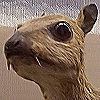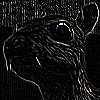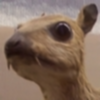
<br><br>

In a convolution layer, you are learning the filter weights (and bias) parameters, adapting the filters to data.  
 <br>

*   Input: Three dimensional tensor, referred to as the input feature map (this can be the output from a previous layer, or an image from the original data) 
  *    Shape: **h** x **w** x **c** (height h, width w, channel c). For a color image, c = 3 RBG channels. 
*    Filters: Can be non-squared but usually squared (i.e. 3x3)
  *    Shape: **k** x **k** x **c** x **n**
    *    k: If squared, has window size k. 
    *    c because each filter is applied across all input channels c
    *    n because there are n filters. 

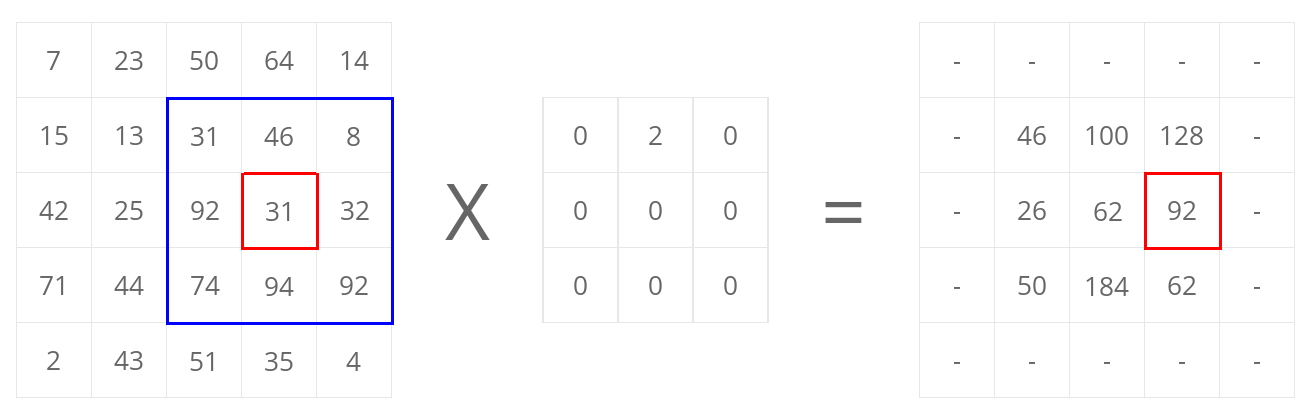

*    Padding size **p** (often zero padding)
  *    After padding p, the first two dimensions of the input feature maps are (h+2p) x (w+2p)
*    Stride **s** (step size of convolution operation). 
*    Output feature map shape: $\frac{(h+2p−k)}{s+1}×\frac{(w+2p−k)}{s+1}×n$
<br><br>
After applying padding to the input feature map, filter weights are multiplied to a local region of the input feature map, and this summed product is outputted to the output feature map. 




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

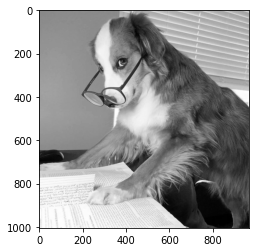

<Figure size 432x288 with 0 Axes>

In [ ]:
#INPUT
image = Image.open("dog1.jpg") #TODO: replace it with whatever local image you upload to your colab files
image_grey = np.asarray(image.convert("L"))
plt.imshow(image_grey, cmap='gray')
plt.show()
plt.clf()

In [ ]:
# FILTERS TO TEST OUT
filter1 = np.ones((3,3))
filter2 = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
filter3 = np.array([[1,0,-1],[0,0,0],[-1,0,1]])

print("filter 1: \n", filter1, "\n")
print("filter 2: ", filter2, "\n")
print("filter 3: ", filter3, "\n")

#TODO: Question for you: Can you take a guess on what these respective filters do? (eg blurring, sharpening...)

filter 1: 
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 

filter 2:  [[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]] 

filter 3:  [[ 1  0 -1]
 [ 0  0  0]
 [-1  0  1]] 



In [ ]:
#To use F.conv, we need to convert our inputs to Tensors

image_t = torch.unsqueeze(torch.from_numpy(np.asarray(image)), 0).float()
image_f = image_t.permute(0,3,1,2) #final input image to conv2d

filter1_t = torch.unsqueeze(torch.from_numpy(filter1),0).float()
filter2_t = torch.unsqueeze(torch.from_numpy(filter2),0).float()
filter3_t = torch.unsqueeze(torch.from_numpy(filter3),0).float()

#filters to pass in conv2d function
filter1_f = torch.stack([filter1_t]*3, 1)
filter2_f = torch.stack([filter2_t]*3, 1)
filter3_f = torch.stack([filter3_t]*3, 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#TODO: change the filter you put into the conv2d (options: filter1_f, filter2_f, filter_3f)
output = F.conv2d(image_f, filter3_f)

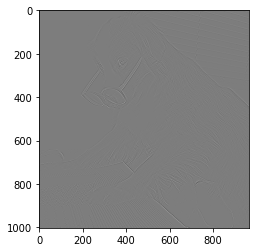

In [ ]:
output_final = torch.flatten(output, end_dim=2)
output_np = output_final.numpy()

plt.imshow(output_np, cmap='gray')
plt.show()

#What does the output look like? What kind of filter is this? 

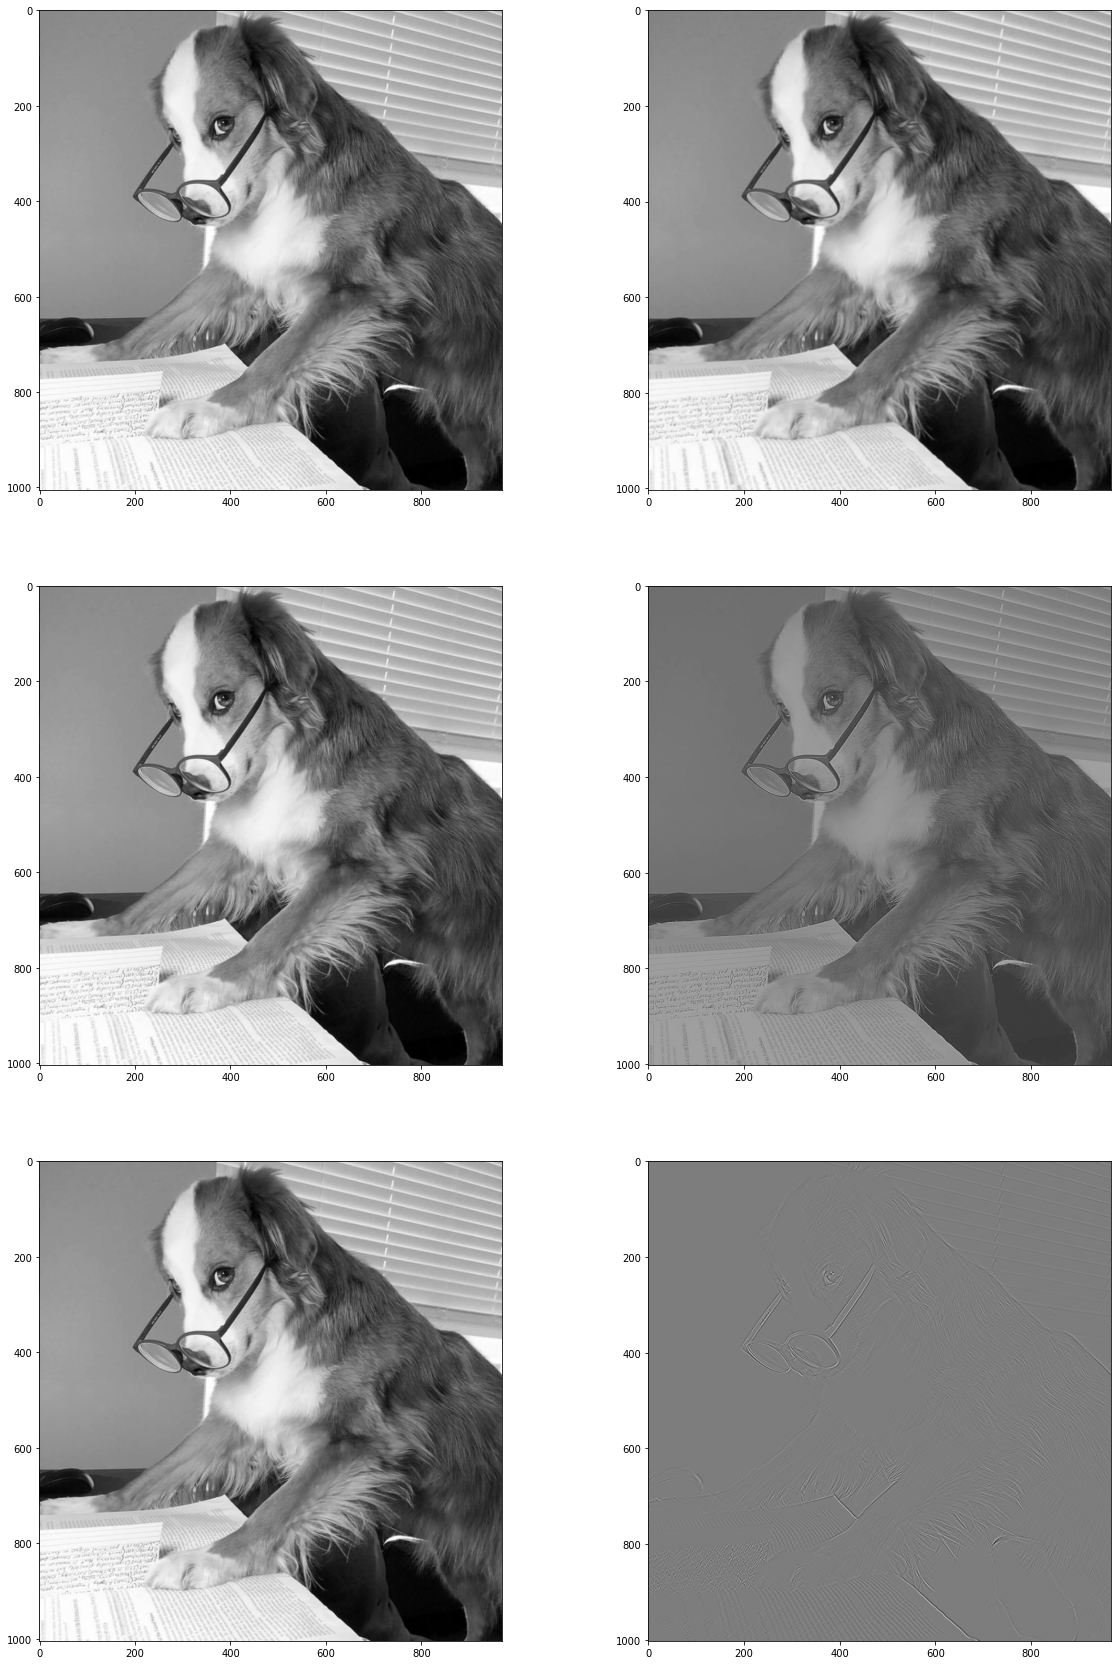

In [ ]:
#Plots original image vs all 3 filters together
outputs = [[]]*4
outputs[0] = image_grey
outputs[1] = F.conv2d(image_f, filter1_f)
outputs[2] = F.conv2d(image_f, filter2_f)
outputs[3] = F.conv2d(image_f, filter3_f)

for i in range(3):
  out = torch.flatten(outputs[i+1], end_dim=2)
  outputs[i+1] = out.numpy()

fig, axes = plt.subplots(figsize=(20,30),nrows=3, ncols=2)

for i in range(3):
  axes[i,0].imshow(outputs[0], cmap='gray')
  axes[i,1].imshow(outputs[i+1], cmap='gray')


"""Answer:
Filter1: Blurs image
Filter2: Sharpens image
Filter3: Finds edges"""